In [25]:
import numpy as np

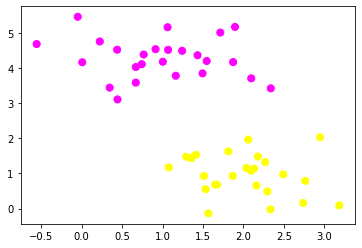

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6,n_features=2)#聚类生成器
#n_samples数据的个数，centers分多少类,random_state随机的样式,cluster_std数据的离散程度,每个样本特征数
#方差的平方根称为标准差(standard deviation, 简写std)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
#1,2个参数确定图中的x，y轴,第一个行都取，只取第0列,c是区分颜色，s是点的粗细

In [38]:
print(X.shape)

(100, 2)


In [55]:
print(X[1,:])

[1.36678633 0.63497163]


In [40]:
print(y)

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


(-1, 3.5)

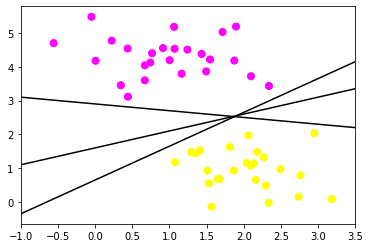

In [83]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
for  m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'k')#xfit是x值，第二项为计算出y
plt.xlim(-1,3.5)#线从-1到3.5

In [67]:
print(xfit)

[-1.         -0.90816327 -0.81632653 -0.7244898  -0.63265306 -0.54081633
 -0.44897959 -0.35714286 -0.26530612 -0.17346939 -0.08163265  0.01020408
  0.10204082  0.19387755  0.28571429  0.37755102  0.46938776  0.56122449
  0.65306122  0.74489796  0.83673469  0.92857143  1.02040816  1.1122449
  1.20408163  1.29591837  1.3877551   1.47959184  1.57142857  1.66326531
  1.75510204  1.84693878  1.93877551  2.03061224  2.12244898  2.21428571
  2.30612245  2.39795918  2.48979592  2.58163265  2.67346939  2.76530612
  2.85714286  2.94897959  3.04081633  3.13265306  3.2244898   3.31632653
  3.40816327  3.5       ]


# 可以认为这是类似svm的表现形式

(-1, 3.5)

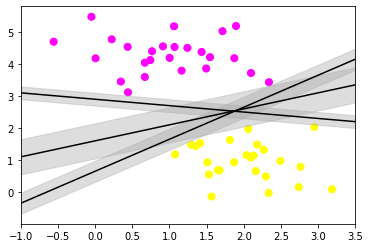

In [82]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
for m,b,d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5)    

# 下面是svm的内容

In [84]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf=SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [105]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

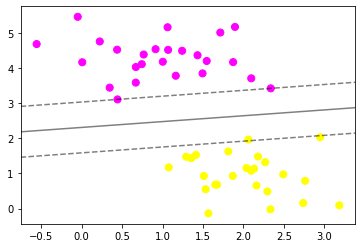

In [106]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

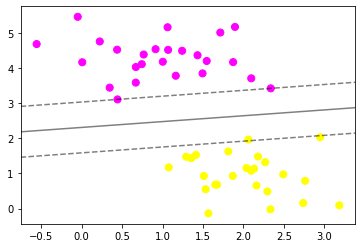

In [110]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=200,facecolors='none')

In [120]:
from ipywidgets import interact#ipython的交互

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[i for i in range(10,210,50)], kernel='linear')

interactive(children=(Dropdown(description='N', options=(10, 60, 110, 160), value=10), Output()), _dom_classes…

<function __main__.plot_svm(N=10)>

# 单纯移动点却不超过边界是不会对分类结果产生影响

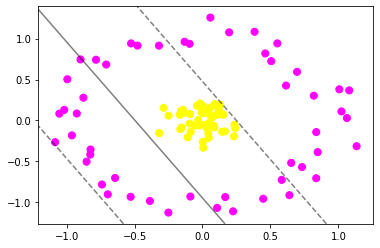

In [124]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=.1,noise=.1)
clf=SVC(kernel='linear').fit(X,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)

# radial basis function(径向基）

In [130]:
r=np.exp(-(X[:,0]**2+X[:,1]**2))
from mpl_toolkits import mplot3d#专门用来话三维图的

#azim 方位角角度  elev海拔
def plot_3D(elev=30,azim=0):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='spring')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D,elev=(-90,90),azim=(-180,180))

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90), IntSlider(value=0, description…

<function __main__.plot_3D(elev=30, azim=0)>

D:\anaconda\envs\py36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


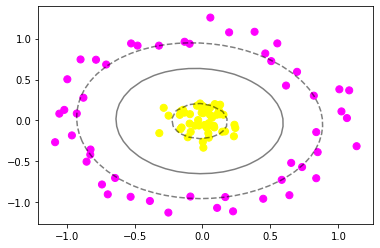

In [131]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

